In [ ]:
# Import libraries
import warnings
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

warnings.simplefilter(action="ignore", category=FutureWarning)

# **Prepare Data**

## **Import**

In [ ]:
def wrangle(filepath):
      # Import_csv
      df = pd.read_csv(filepath)

      # Subset data: Apartments in "Capital Federal", less than 400,000
      mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")
      mask_apt = df["property_type"] == "apartment"
      mask_price = df["price_aprox_usd"] < 400_000
      df = df[mask_ba & mask_apt & mask_price]

      return df

In [ ]:
df = wrangle("buenos-aires-real-estate-1.csv")
print(df.shape)
df.head()

(1781, 16)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Argentina|Capital Federal|Villa Crespo|,"-34.6047834183,-58.4586812499",180000.0,USD,2729232.0,180000.0,120.0,110.0,1500.000000,1636.363636,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
11,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6050060697,-58.4001162302",60000.0,USD,909744.0,60000.0,28.0,28.0,2142.857143,2142.857143,NaN,1.0,NaN,http://once.properati.com.ar/zz0q_venta_depart...
20,sell,apartment,|Argentina|Capital Federal|San Nicolás|,"-34.603898,-58.378617",69000.0,USD,1046205.6,69000.0,NaN,22.0,NaN,3136.363636,23.0,2.0,NaN,http://san-nicolas.properati.com.ar/rnju_venta...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1781 entries, 0 to 8604
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   1781 non-null   object 
 1   property_type               1781 non-null   object 
 2   place_with_parent_names     1781 non-null   object 
 3   lat-lon                     1723 non-null   object 
 4   price                       1781 non-null   float64
 5   currency                    1781 non-null   object 
 6   price_aprox_local_currency  1781 non-null   float64
 7   price_aprox_usd             1781 non-null   float64
 8   surface_total_in_m2         1247 non-null   float64
 9   surface_covered_in_m2       1635 non-null   float64
 10  price_usd_per_m2            1198 non-null   float64
 11  price_per_m2                1618 non-null   float64
 12  floor                       482 non-null    float64
 13  rooms                       1385 

## **Explore**

### **Data Type**

In [ ]:
# Location information is in a single column where the data type is `object`
# Split "lat-lon" column where the data type is float
df[["lat", "lon"]] = df["lat-lon"].str.split(",", expand=True).astype(float)
# Drop the `"lat-lon"` column
df.drop(columns="lat-lon", inplace=True)

### **Missing Values**

In [ ]:
# Check missing values
df.isnull().sum() / len(df)

operation                     0.000000
property_type                 0.000000
place_with_parent_names       0.000000
price                         0.000000
currency                      0.000000
price_aprox_local_currency    0.000000
price_aprox_usd               0.000000
surface_total_in_m2           0.299832
surface_covered_in_m2         0.081976
price_usd_per_m2              0.327344
price_per_m2                  0.091522
floor                         0.729366
rooms                         0.222347
expenses                      0.744526
properati_url                 0.000000
lat                           0.032566
lon                           0.032566
dtype: float64

In [ ]:
# Drop features with high null counts
df.drop(columns = ["floor","expenses"], inplace= True)

### **Low and High Cardinality**

In [ ]:
# Calculate the number of unique values for each non-numeric feature in `df`
df.select_dtypes("object").nunique()

operation                     1
property_type                 1
place_with_parent_names      55
currency                      2
properati_url              1781
dtype: int64

In [ ]:
#Drop low and high cardinality categorical variables
df.drop(columns= ["operation", "property_type", "currency","properati_url"], inplace=True)

### **Leakage**

In [ ]:
#Drop Leakey columns
df.drop(columns= [
        "price",
        "price_aprox_local_currency",
        "price_per_m2",
        "price_usd_per_m2"
         ],
inplace= True)

### **Multicollinearity**

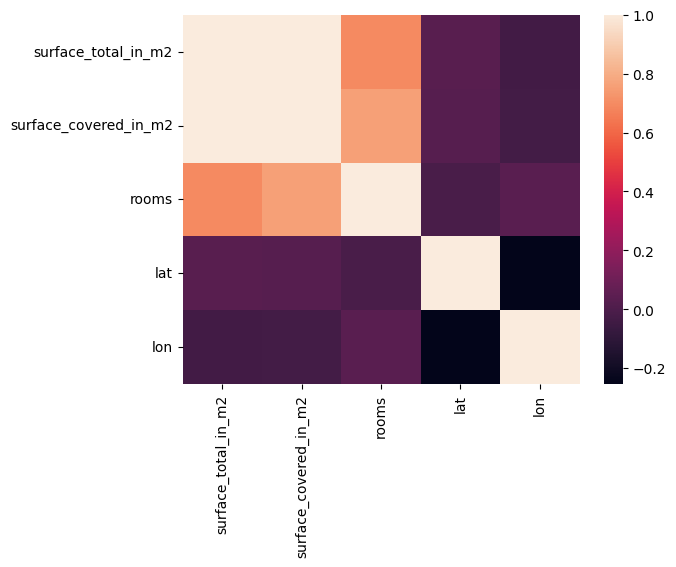

In [ ]:
# Correlation heatmap of the remaining numerical features in `df`
corr = df.select_dtypes("number").drop(columns= "price_aprox_usd").corr()
sns.heatmap(corr);

In [ ]:
#Drop columns with multicollinearity
df.drop(columns=["surface_total_in_m2", "rooms"], inplace=True)

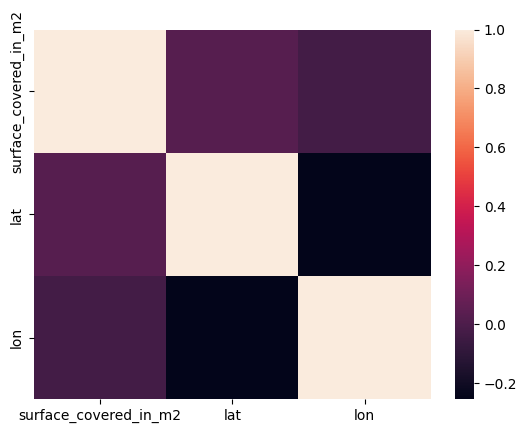

In [ ]:
# Check the multicollinearity again
corr = df.select_dtypes("number").drop(columns= "price_aprox_usd").corr()
sns.heatmap(corr);

### **Area Distribution**

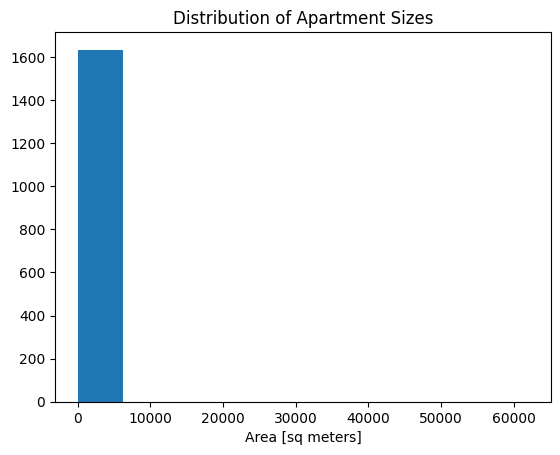

In [ ]:
# Create a histogram of `"surface_covered_in_m2"`
plt.hist(df["surface_covered_in_m2"])
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Apartment Sizes");

In [ ]:
# The summary statistics for the `surface_covered_in_m2`
df.describe()["surface_covered_in_m2"]

count     1635.000000
mean        97.877064
std       1533.057610
min          0.000000
25%         38.000000
50%         50.000000
75%         73.000000
max      62034.000000
Name: surface_covered_in_m2, dtype: float64

In [ ]:
# Remove outliers for "surface_covered_in_m2"
low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
mask_area = df["surface_covered_in_m2"].between(low, high)
df = df[mask_area]

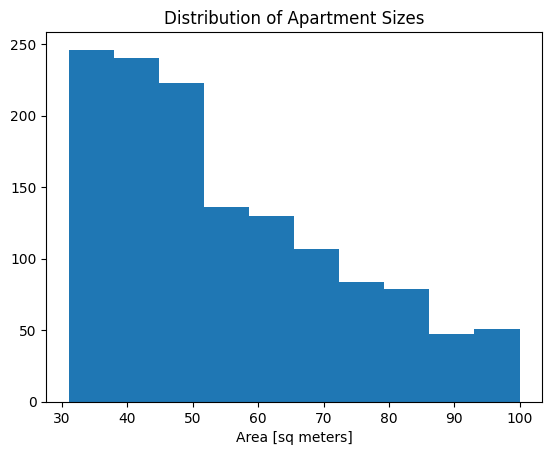

In [ ]:
# Recreate a histogram of `"surface_covered_in_m2"`
plt.hist(df["surface_covered_in_m2"])
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Apartment Sizes");

### **Extract Neighborhood Names**

In [ ]:
# Find the neighborhood for each property in the `"place_with_parent_names"` column
df["place_with_parent_names"].head()

4        |Argentina|Capital Federal|Chacarita|
9       |Argentina|Capital Federal|Villa Luro|
29       |Argentina|Capital Federal|Caballito|
40    |Argentina|Capital Federal|Constitución|
41            |Argentina|Capital Federal|Once|
Name: place_with_parent_names, dtype: object

In [ ]:
# Extract neighborhood
df["neighborhood"]= df["place_with_parent_names"].str.split("|",expand=True)[3]
# Drop the `"place_with_parent_names"` column
df.drop(columns="place_with_parent_names", inplace= True)

# **Final Version of Wrangle Function and The Dataframe**

In [ ]:
def wrangle(filepath):
      # Import_csv
      df = pd.read_csv(filepath)

      # Subset data: Apartments in "Capital Federal", less than 400,000
      mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")
      mask_apt = df["property_type"] == "apartment"
      mask_price = df["price_aprox_usd"] < 400_000
      df = df[mask_ba & mask_apt & mask_price]

      # Split "lat-lon" column
      df[["lat", "lon"]] = df["lat-lon"].str.split(",", expand=True).astype(float)
      df.drop(columns="lat-lon", inplace=True)

      # Drop features with high null counts
      df.drop(columns = ["floor","expenses"], inplace= True)

      # Drop low and high cardinality categorical variables
      df.drop(columns= ["operation", "property_type", "currency","properati_url"], inplace=True)

      # Drop Leakey columns
      df.drop(columns= [
          "price",
          "price_aprox_local_currency",
          "price_per_m2",
          "price_usd_per_m2"
           ],
      inplace= True)

      # Drop columns with multicollinearity
      df.drop(columns=["surface_total_in_m2", "rooms"], inplace=True)

      # Subset data: Remove outliers for "surface_covered_in_m2"
      low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
      mask_area = df["surface_covered_in_m2"].between(low, high)
      df = df[mask_area]

      # Get place name
      df["neighborhood"] = df["place_with_parent_names"].str.split("|",expand=True)[3]
      df.drop(columns="place_with_parent_names", inplace=True)

      return df

In [ ]:
# Create a list that contains the filenames for all real estate CSV files
files = glob("buenos-aires-real-estate-*.csv")
files

['buenos-aires-real-estate-5.csv',
 'buenos-aires-real-estate-2.csv',
 'buenos-aires-real-estate-3.csv',
 'buenos-aires-real-estate-4.csv',
 'buenos-aires-real-estate-1.csv']

In [ ]:
# Use the wrangle function in a for loop to create a list named frames
frames = []
for file in files:
   df= wrangle(file)
   frames.append(df)
len(frames)

5

In [ ]:
# Use `pd.concat` to concatenate the items in frames into a single DataFrame `df`
df = pd.concat(frames, ignore_index= True)
print(df.shape)
df.head()
print(df.info())

(6582, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6582 entries, 0 to 6581
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_aprox_usd        6582 non-null   float64
 1   surface_covered_in_m2  6582 non-null   float64
 2   lat                    6316 non-null   float64
 3   lon                    6316 non-null   float64
 4   neighborhood           6582 non-null   object 
dtypes: float64(4), object(1)
memory usage: 257.2+ KB
None
